# <p style="text-align: center;"> Aula Prática 02</p>

## Objetivos desta aula:

    - Filtros Lineares
    - Convolução


## Professor: Jefersson dos Santos - jefersson@dcc.ufmg.br
### Monitor: Caio Cesar - caiosilva@ufmg.br

# Filtros Lineares e Convoluções

### Importações gerais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage import data, filters
from ipywidgets import widgets
from scipy.ndimage import convolve
%matplotlib inline

### Definição opcional de função show( )

In [2]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

### Imagem que iremos usar

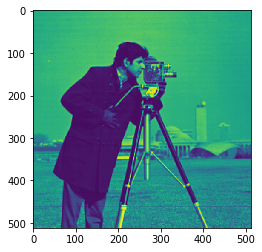

In [3]:
image = data.camera()
plt.imshow(image)

### Exemplo de gaussiana

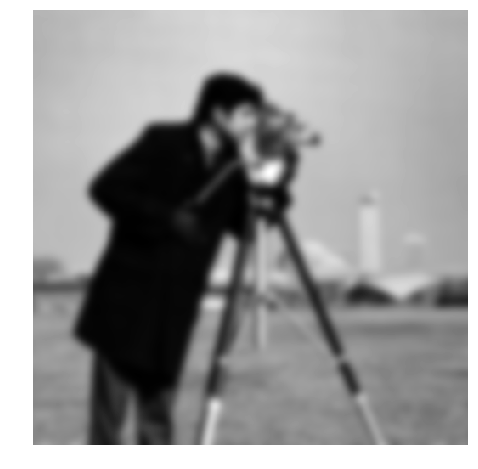

In [4]:
smooth_image = filters.gaussian(image, 5)
show(smooth_image);

### Definindo Filtros ( bordas)

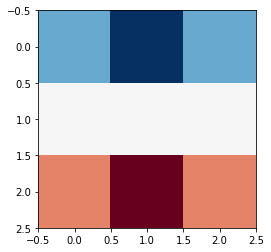

In [5]:
horizontal_edge_kernel = np.array([[ 1,  2,  1],
                                   [ 0,  0,  0],
                                   [-1, -2, -1]])
plt.imshow(horizontal_edge_kernel, cmap=plt.cm.RdBu);

### Aplicando filtro de bordas 

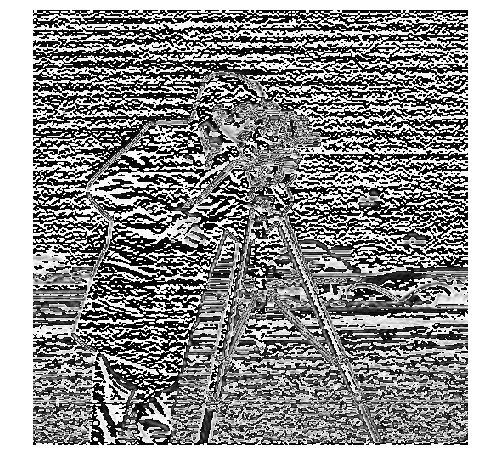

In [6]:
edge_response = convolve(image, horizontal_edge_kernel)
show(edge_response)

### Adicionando ruido (sal e pimenta)

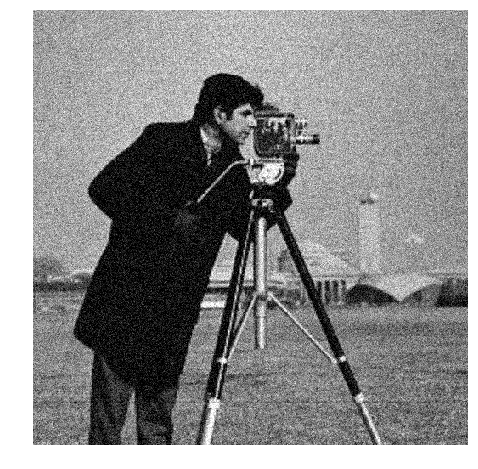

In [7]:
img_n = sku.random_noise(image)
show(img_n)

### Definindo Filtros (média)

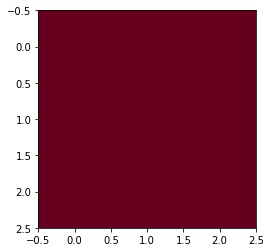

In [8]:
mean_kernel = np.array([[ 0.11,  0.11,  0.11],
                        [ 0.11,  0.11,  0.11],
                        [0.11, 0.11, 0.11]])
plt.imshow(mean_kernel, cmap=plt.cm.RdBu);


#OU 

# mean_kernel = np.ones((3, 3), dtype=float)
# mean_kernel /= mean_kernel.size
# print(mean_kernel)

### Resultado da filtragem

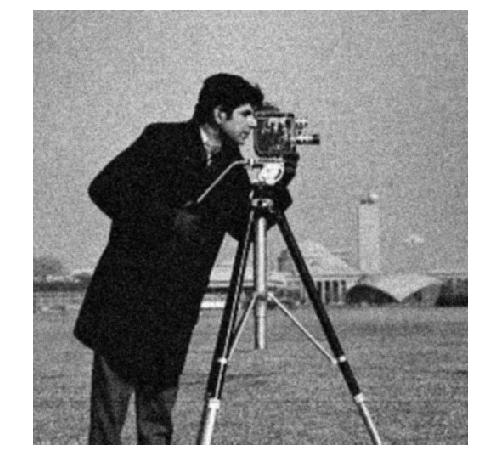

In [9]:
mean_response = convolve(img_n, mean_kernel)
show(mean_response)

### Utilizando Split-Bregman

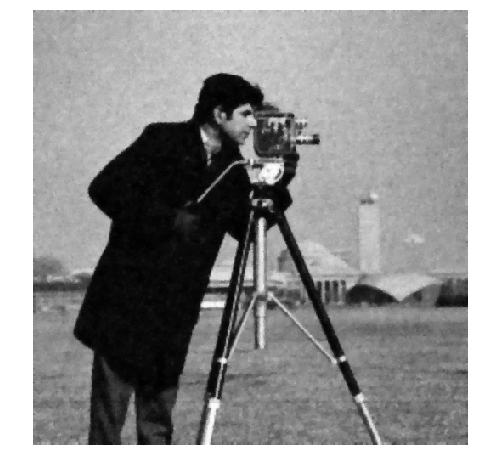

In [10]:
img_r = skimage.restoration.denoise_tv_bregman(img_n, 5.)
show(img_r)

### Widget Simples Bordas com Filtro (Threshold)

In [11]:
@widgets.interact(x=(0.01, .2, .005))
def edge(x):
    show(skif.sobel(image) < x)    

interactive(children=(FloatSlider(value=0.105, description='x', max=0.2, min=0.01, step=0.005), Output()), _dom_classes=('widget-interact',))

## Filtros Diversos

### 3x2

[[0.15349257 0.64025061]
 [0.80850245 0.95569204]
 [0.83309513 0.87840256]]


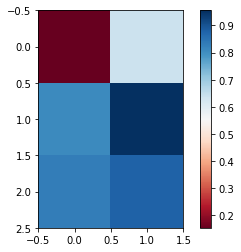

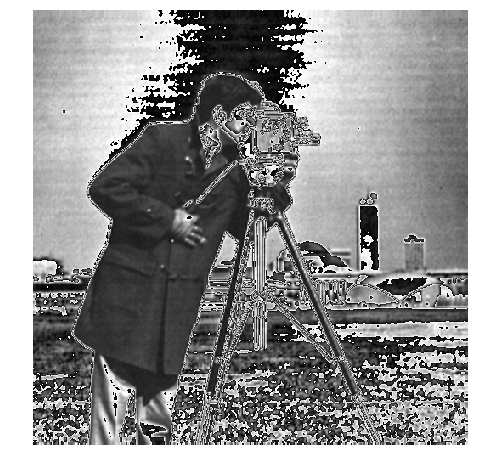

In [12]:
random_kernel = np.random.rand(3,2)
print(random_kernel)
plt.imshow(random_kernel, cmap=plt.cm.RdBu);
plt.colorbar()
random_response = convolve(image, random_kernel)
show(random_response)

### 10x10

[[0.98953703 0.52343663 0.10398318 0.83498214 0.07093824 0.71369079
  0.13797974 0.63747682 0.38896386 0.69075368]
 [0.55704097 0.72268888 0.18491084 0.37964552 0.30349769 0.73448303
  0.86613374 0.44033505 0.60129842 0.38183974]
 [0.92491055 0.11413346 0.45931493 0.39879435 0.46808252 0.89021563
  0.4788288  0.4669109  0.6342034  0.44134854]
 [0.53251071 0.71576487 0.9375     0.96401609 0.25778245 0.46866109
  0.68924554 0.05979629 0.22281162 0.44558773]
 [0.14449717 0.96170741 0.27468946 0.24323812 0.83913438 0.20995425
  0.8215968  0.88771213 0.62049266 0.37420133]
 [0.61410312 0.30144711 0.27797792 0.72282703 0.56651507 0.06563738
  0.15860158 0.98328379 0.54379021 0.07373274]
 [0.04504312 0.66580069 0.30388233 0.38798822 0.96951698 0.47765006
  0.50591385 0.57339339 0.28749576 0.49546468]
 [0.60118568 0.49221507 0.5572935  0.94422809 0.92053527 0.07966677
  0.01496254 0.5410333  0.03039726 0.95485705]
 [0.75627553 0.1339412  0.61123064 0.34866546 0.98879638 0.77410426
  0.57040809

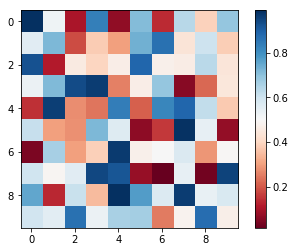

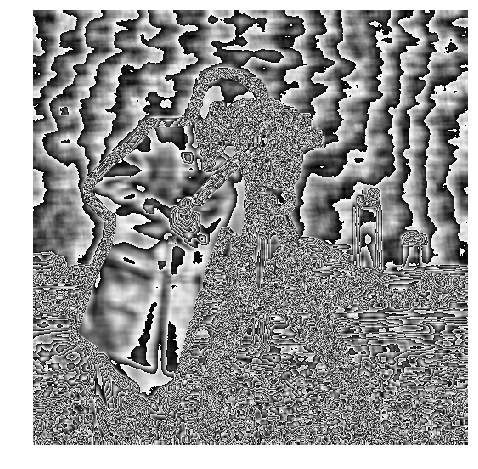

In [13]:
random_kernel = np.random.rand(10,10)
print(random_kernel)
plt.imshow(random_kernel, cmap=plt.cm.RdBu);
plt.colorbar()
random_response = convolve(image, random_kernel)
show(random_response)

### 37x48

[[0.84596602 0.93219666 0.45308281 ... 0.77340785 0.08493292 0.57955131]
 [0.96676116 0.21427756 0.45196219 ... 0.80846445 0.74242114 0.55438045]
 [0.04063915 0.71416969 0.32286046 ... 0.85947893 0.66445767 0.94113038]
 ...
 [0.30477499 0.75313428 0.24204002 ... 0.65763174 0.34408879 0.44673308]
 [0.38985891 0.19642848 0.05926643 ... 0.46042994 0.3594968  0.48005289]
 [0.2364334  0.08420234 0.98344603 ... 0.46519095 0.55968088 0.39192541]]


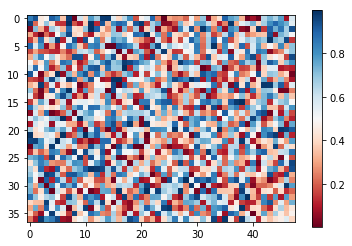

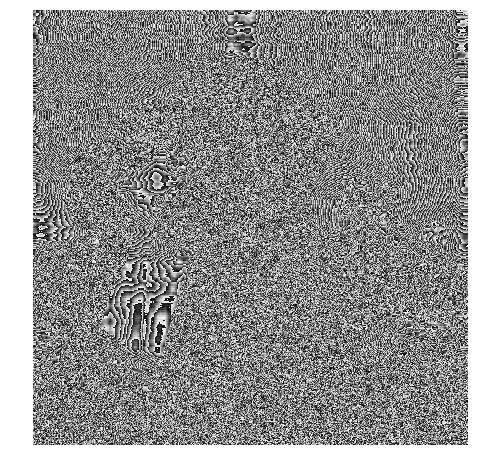

In [14]:
random_kernel = np.random.rand(37,48)
print(random_kernel)
plt.imshow(random_kernel, cmap=plt.cm.RdBu);
plt.colorbar()
random_response = convolve(image, random_kernel)
show(random_response)

## Combinação de Filtros

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


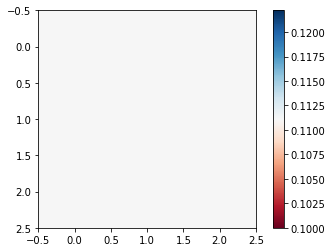

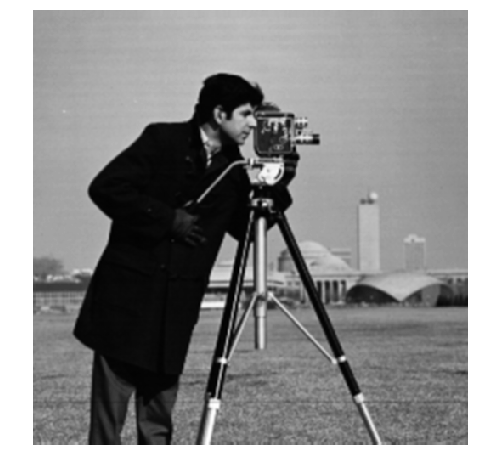

[[0.65482772 0.59890674]
 [0.07637112 0.98571539]
 [0.19089878 0.37165641]]


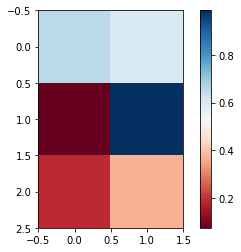

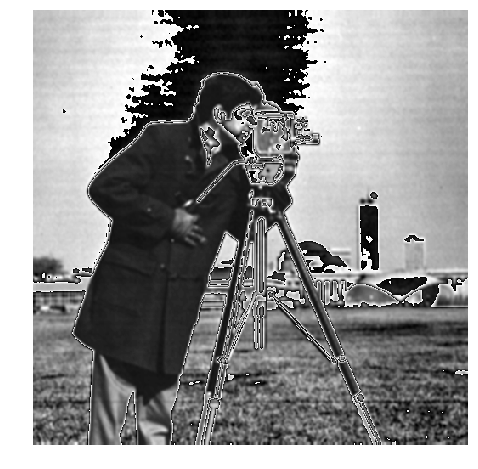

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


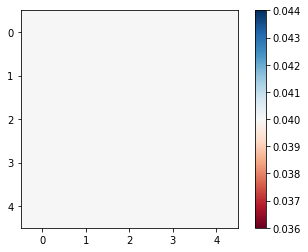

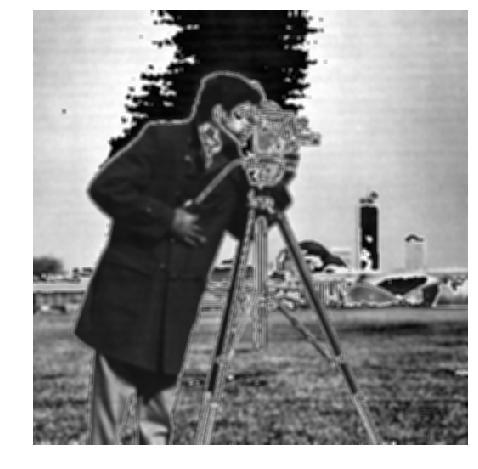

In [16]:
#filtro media 3x3
mean_kernel = np.ones((3, 3), dtype=float)
mean_kernel /= mean_kernel.size
print(mean_kernel)
plt.imshow(mean_kernel, cmap=plt.cm.RdBu);
plt.colorbar()
mean_response = convolve(image, mean_kernel)
show(mean_response)

#filtro aleatorio 3x2
random_kernel = np.random.rand(3,2)
print(random_kernel)
plt.imshow(random_kernel, cmap=plt.cm.RdBu);
plt.colorbar()
random_response = convolve(mean_response, random_kernel)
show(random_response)

#filtro media 5x5
mean_kernel = np.ones((5, 5), dtype=float)
mean_kernel /= mean_kernel.size
print(mean_kernel)
plt.imshow(mean_kernel, cmap=plt.cm.RdBu);
plt.colorbar()
mean_response = convolve(random_response, mean_kernel)
show(mean_response)


# Filtros Multidimensionais (Imagens Coloridas)

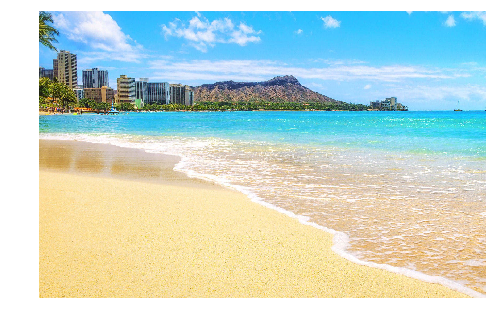

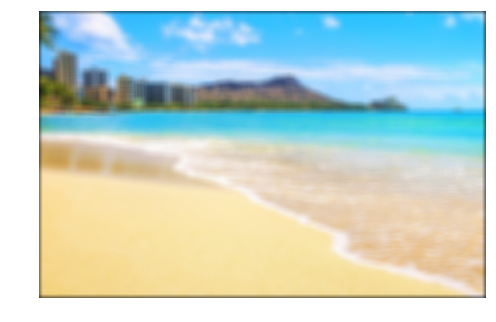

In [17]:
from scipy import ndimage
import skimage.io as io

img = io.imread('beach.jpg')  
show(img)
mean_kernel =  np.ones((30, 30, 1))
mean_kernel /= mean_kernel.size
mean_response = ndimage.convolve(img, mean_kernel, mode='constant', cval=0.0)
show(mean_response)

# Exercício

Crie um novo notebook jupyter cujo nome deve seguir a seguinte syntaxe:
    
        lab2-SUAMATRICULA.iypnb

    Defina os demais filtros : média, mediana, bordas horizontais, bordas verticais, Sobel, Roberts, Prewit
    Aplique ele em uma imagem escala de cinza
    Mostre o resultado das filtragens
    Altere o tamanho dos kernels e repita os processos anteriores
    Responda: O que mudou ao alterar o tamanho dos kernels?
    Faça uma combinação de filtros, aplique três filtros diferentes dos apresentados a cima em uma imagem
    Escolha uma imagem colorida, aplique o ruido e depois remova o mesmo com os filtros.

# Widget Convolução

## Funcões Auxiliares

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from ipywidgets import IntSlider
from ipywidgets import widgets

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

def iter_pixels(image):
    height, width = image.shape[:2]
    for i in range(height):
        for j in range(width):
            yield (i, j), image[i, j]
            
def imshow_pair(image_pair, titles=('', ''), figsize=(10, 5), **kwargs):
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    for ax, img, label in zip(axes.ravel(), image_pair, titles):
        ax.imshow(img, **kwargs)
        ax.set_title(label)
        
def padding_for_kernel(kernel):
    image_shape = kernel.shape[:2]    
    assert all((size % 2) == 1 for size in image_shape)
    return [(size - 1) // 2 for size in image_shape]

def add_padding(image, kernel):
    h_pad, w_pad = padding_for_kernel(kernel)
    return np.pad(image, ((h_pad, h_pad), (w_pad, w_pad)),
                  mode='constant', constant_values=0)

def remove_padding(image, kernel):
    inner_region = [] 
    for pad in padding_for_kernel(kernel):
        slice_i = slice(None) if pad == 0 else slice(pad, -pad)
        inner_region.append(slice_i)
    return image[inner_region]

def window_slice(center, kernel):
    r, c = center
    r_pad, c_pad = padding_for_kernel(kernel)
    return [slice(r-r_pad, r+r_pad+1), slice(c-c_pad, c+c_pad+1)]

def apply_kernel(center, kernel, original_image):
    image_patch = original_image[window_slice(center, kernel)]
    return np.sum(kernel * image_patch)

def iter_kernel_labels(image, kernel):
    original_image = image
    image = add_padding(original_image, kernel)
    i_pad, j_pad = padding_for_kernel(kernel)
    for (i, j), pixel in iter_pixels(original_image):
        i += i_pad
        j += j_pad
        mask = np.zeros(image.shape, dtype=int)  
        mask[window_slice((i, j), kernel)] = 1   
        mask[i, j] = 2                           
        yield (i, j), mask

def visualize_kernel(kernel_labels, image):
    return color.label2rgb(kernel_labels, image, bg_label=0,
                           colors=('yellow', 'red'))

def make_convolution_step_function(image, kernel, **kwargs):
    gen_kernel_labels = iter_kernel_labels(image, kernel)       
    image_cache = []
    image = add_padding(image, kernel)
    
    def convolution_step(i_step):
        it = iter(gen_kernel_labels)
        while i_step >= len(image_cache):
            filtered_prev = image if i_step == 0 else image_cache[-1][1]
            filtered = filtered_prev.copy()
            center, kernel_labels = next(gen_kernel_labels)
            filtered[center] = apply_kernel(center, kernel, image)
            kernel_overlay = visualize_kernel(kernel_labels, image)
            image_cache.append((kernel_overlay, filtered))
        image_pair = [remove_padding(each, kernel) for each in image_cache[i_step]]
        imshow_pair(image_pair, **kwargs)
        plt.show()
        
    return convolution_step 

def interactive_convolution_demo(image, kernel, **kwargs):
    convolution_step = make_convolution_step_function(image, kernel, **kwargs)
    step_slider = IntSlider(min=0, max=image.size-1, value=0)
    widgets.interact(convolution_step, i_step=step_slider)

## Código Principal

In [30]:
bright_square = np.zeros((7, 7), dtype=float)
bright_square[2:5, 2:5] = 1

mean_kernel = np.ones((3, 3), dtype=float)
mean_kernel /= mean_kernel.size
print(mean_kernel)

titles = ('Imagem e kernel', 'Imagem filtrada')
interactive_convolution_demo(bright_square, mean_kernel, 
                             vmax=1, titles=titles)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-interact',))

# Material Extra:

 Filtros do Instagram em Python :
 
 http://www.practicepython.org/blog/2016/12/20/instagram-filters-python.html
 
 Aplicando os filtros convulacionais na mão:
 
 https://softwaredevelopmentperestroika.wordpress.com/2014/02/11/image-processing-with-python-numpy-scipy-image-convolution/
 
 